In [1]:
%load_ext autoreload
%autoreload 2

# Create data for pilot qualitative evaluations

In [2]:
from ffdata.datasets.cocktail_party import CocktailPartyDataset

dataset = CocktailPartyDataset()
dataset.load_data(features_file="../data/cocktail_party/features.txt",
                  groups_file="../data/cocktail_party/groups_train.txt")
print("Loaded {} frames of groups".format(len(dataset.groups.keys())))

groups_keys = list(dataset.groups.keys())

Loaded 257 frames of groups


Got 328 groups total with at least 2 individuals
End stamp - start stamp =  1425.0326790809631 seconds


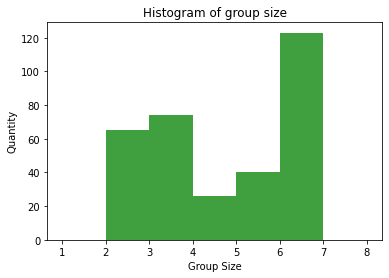

In [3]:
import matplotlib.pyplot as plt

def extract_group_size_and_stamps(dataset):

    group_size = []    # number of people in the group
    group_stamp = []   # stamp where the group comes from
    for stamp in groups_keys:
        for group in dataset.groups[stamp]:
            n = len(group)
            if n > 1:
                group_size.append(n)
                group_stamp.append(stamp)

    return group_size, group_stamp

group_size, group_stamp = extract_group_size_and_stamps(dataset)
                
print("Got {} groups total with at least 2 individuals".format(len(group_size)))
print("End stamp - start stamp = ", float(group_stamp[-1]) - float(group_stamp[0]), "seconds")

def plot_hist(data, bins=range(1,9)):

    # the histogram of the data
    n, bins, patches = plt.hist(data, bins=bins, facecolor='g', alpha=0.75)

    plt.xlabel('Group Size')
    plt.ylabel('Quantity')
    plt.title('Histogram of group size')
    plt.show()
    
plot_hist(group_size)

## Create true groups

In [4]:
import numpy as np
import random
import pandas as pd
from collections import OrderedDict
from IPython.display import display, HTML

x_index = 0
y_index = 1
theta_index = 3

# Pick a subset of groups based on group size
num_groups_per_size = 2
group_size = np.array(group_size)

def create_out_groups_dict():
    output_groups = OrderedDict()
    output_groups['label'] = []
    output_groups['stamp'] = []
    output_groups['num_people'] = []
    for i in range(6):
        output_groups['p%d_id' % i] = []
        output_groups['p%d_x' % i] = []
        output_groups['p%d_y' % i] = []
        output_groups['p%d_theta' % i] = []
    return output_groups

output_groups = create_out_groups_dict()
        
for s in [2,3,4,5,6]:
    idx_desired_size = np.argwhere(group_size == s).flatten()
    
    # pick one index
    idx = idx_desired_size[np.random.randint(0, len(idx_desired_size))]
    print("Size {} - Idx {}".format(s, idx))
    
    gs = group_stamp[idx]  # group stamp
    
    group_members = None   # group members
    for group in dataset.groups[gs]: 
        if len(group) == s:
            group_members = group
            random.shuffle(group_members) # shuffle order so that we don't always pick the same person
            break
    assert group_members is not None
    
    print("\tMembers: {}".format(group_members))
    
    # get features
    feat = dataset.features[gs]
    
    output_groups['label'].append("gt")
    output_groups['stamp'].append(gs)
    output_groups['num_people'].append(s)
    for i in range(6):
        if i < s:
            output_groups['p%d_id' % i].append(group_members[i])
            output_groups['p%d_x' % i].append(feat[group_members[i]][x_index])
            output_groups['p%d_y' % i].append(feat[group_members[i]][y_index])
            output_groups['p%d_theta' % i].append(feat[group_members[i]][theta_index])
        else:
            output_groups['p%d_id' % i].append("")
            output_groups['p%d_x' % i].append(np.nan)
            output_groups['p%d_y' % i].append(np.nan)
            output_groups['p%d_theta' % i].append(np.nan)
            


Size 2 - Idx 132
	Members: ['ID_005', 'ID_001']
Size 3 - Idx 12
	Members: ['ID_001', 'ID_006', 'ID_004']
Size 4 - Idx 327
	Members: ['ID_002', 'ID_005', 'ID_003', 'ID_004']
Size 5 - Idx 80
	Members: ['ID_005', 'ID_002', 'ID_006', 'ID_003', 'ID_004']
Size 6 - Idx 282
	Members: ['ID_003', 'ID_005', 'ID_001', 'ID_004', 'ID_002', 'ID_006']


## Create fake groups

In [5]:
for s in [2,3,4,5, 6]:
    idx_desired_size = np.argwhere(group_size == s).flatten()
    
    # pick one index
    idx = idx_desired_size[np.random.randint(0, len(idx_desired_size))]
    print("Size {} - Idx {}".format(s, idx))
    
    gs = group_stamp[idx]  # group stamp
    
    group_members = None   # group members
    for group in dataset.groups[gs]: 
        if len(group) == s:
            group_members = group
            random.shuffle(group_members) # shuffle order so that we don't always pick the same person
            break
    assert group_members is not None

    other_people = [x for x in dataset.person_ids if x not in group_members]
    random.shuffle(other_people)
    
    print("\tMembers: {}".format(group_members))
    print("\tOther people: {}".format(other_people))
    
    # get features
    feat = dataset.features[gs]
    
    output_groups['label'].append("fake")
    output_groups['stamp'].append(gs)
    output_groups['num_people'].append(s)
    
    for i in range(6):
        if i < s:
            if i == 0: # change person
                
                if s == 6:
                    # for group of size 6, we change the orientation of the person by 180 degres
                    output_groups['p%d_id' % i].append(group_members[i])
                    output_groups['p%d_x' % i].append(feat[group_members[i]][x_index])
                    output_groups['p%d_y' % i].append(feat[group_members[i]][y_index])
                    output_groups['p%d_theta' % i].append(feat[group_members[i]][theta_index] + np.pi)
                    
                else:
                    # we use another person
                    output_groups['p%d_id' % i].append(other_people[i])
                    output_groups['p%d_x' % i].append(feat[other_people[i]][x_index])
                    output_groups['p%d_y' % i].append(feat[other_people[i]][y_index])
                    output_groups['p%d_theta' % i].append(feat[other_people[i]][theta_index])
            else:
                output_groups['p%d_id' % i].append(group_members[i])
                output_groups['p%d_x' % i].append(feat[group_members[i]][x_index])
                output_groups['p%d_y' % i].append(feat[group_members[i]][y_index])
                output_groups['p%d_theta' % i].append(feat[group_members[i]][theta_index])
        else:
            output_groups['p%d_id' % i].append("")
            output_groups['p%d_x' % i].append(np.nan)
            output_groups['p%d_y' % i].append(np.nan)
            output_groups['p%d_theta' % i].append(np.nan)
            


Size 2 - Idx 30
	Members: ['ID_004', 'ID_003']
	Other people: ['ID_002', 'ID_005', 'ID_001', 'ID_006']
Size 3 - Idx 202
	Members: ['ID_004', 'ID_005', 'ID_002']
	Other people: ['ID_006', 'ID_001', 'ID_003']
Size 4 - Idx 224
	Members: ['ID_002', 'ID_004', 'ID_001', 'ID_005']
	Other people: ['ID_006', 'ID_003']
Size 5 - Idx 64
	Members: ['ID_004', 'ID_005', 'ID_006', 'ID_003', 'ID_001']
	Other people: ['ID_002']
Size 6 - Idx 52
	Members: ['ID_005', 'ID_006', 'ID_004', 'ID_001', 'ID_002', 'ID_003']
	Other people: []


## Save groups to disk

In [6]:
df = pd.DataFrame(output_groups, columns=output_groups.keys())
display(HTML(df.to_html()))
df.to_csv("render_pilot.csv", index=False)